✅ Dataset Loaded — Shape: (1728, 7)
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

✅ Accuracy: 0.9827

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.93      0.93      0.93        14
           2       0.99      1.00      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



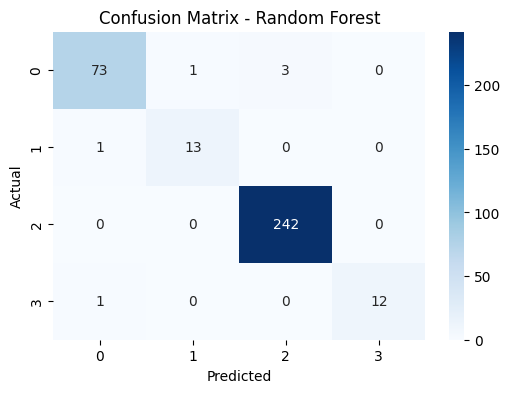

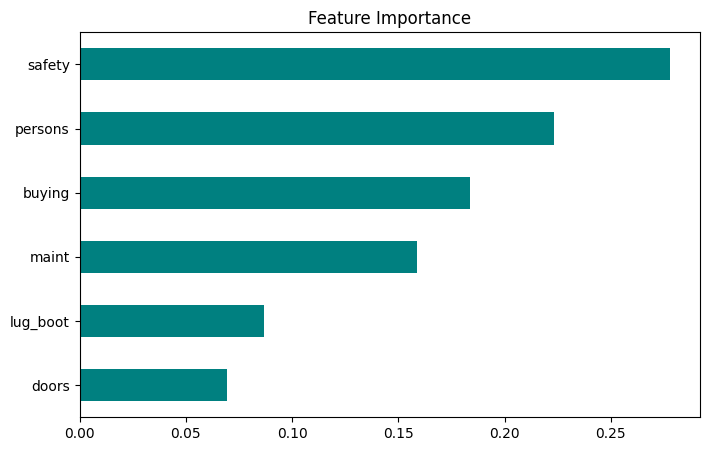

In [1]:
# Import libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv(url, names=cols)
print("✅ Dataset Loaded — Shape:", df.shape)
print(df.head())

# Encode categorical variables
df = df.apply(LabelEncoder().fit_transform)

# Split data
X, y = df.drop("class", axis=1), df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# Feature Importance
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot.barh(
    figsize=(8, 5), title="Feature Importance", color="teal"
)
plt.show()
